In [3]:
!pip install xgboost
!pip install shap
!pip install eli5
!pip install lime
!pip install sklearn
!pip install pdpbox

In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("standardised_data.csv")
df.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,0.0,0.001508,0.090287,0.090032,0.077441,0.256321,0.888663,0.045086,0.852140,0.705433,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.307541,0.005747,0.058824,0.005814,0.083333,0.729032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.04,0.0,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,1.000000,0.087719
1,0.0,0.0,0.002085,0.311736,0.132924,0.271605,0.045016,0.476287,0.043648,0.951929,0.959566,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.727773,0.002874,0.000000,0.002907,0.000000,0.802151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.166667,0.571429,0.25,0.25,0.2,0.166667,0.684211
2,0.0,0.0,0.000354,0.022472,0.020025,0.023569,0.134897,0.347505,0.046161,0.827335,0.648326,1.0,1.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.650189,0.000000,0.000000,0.000000,0.000000,0.805257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,1.0,0.5,1.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.166667,0.192982
3,0.0,0.0,0.000816,0.116854,0.078975,0.117845,0.392880,0.297482,0.038820,0.825268,0.519522,1.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.5,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.377471,0.000000,0.000000,0.000000,0.000000,0.735723,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.666667,0.649123
4,0.0,0.0,0.000623,0.111235,0.101018,0.103255,0.491595,0.466350,0.042604,0.798557,0.933722,1.0,1.0,1.0,1.0,0.0,0.052632,0.5,0.5,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.414297,0.000000,0.000000,0.000000,0.000000,0.394026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003831,0.04,0.0,0.5,0.0,1.0,0.833333,0.571429,1.00,0.25,0.2,1.000000,0.578947


In [6]:
y = df[['TARGET']]
X = df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [7]:
def model_accuracy (X_test :pd.DataFrame, y_test :pd.DataFrame, model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ",(accuracy * 100.0))

In [8]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
model_accuracy(X_test,y_test,model_XGB)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[48557     0]
 [ 4122     6]]
Accuracy:  92.17614121666509


In [9]:
model_XGB.save_model('XGBOOST_SHAP.model')

In [10]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_XGB)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)



In [11]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test.iloc[10,:])

In [12]:
#chaque caractéristique contribue à déplacer la prédiction de la valeur de base à la valeur de 
#sortie du modèle soit en diminuant soit en augmentant la probabilité de notre classe

In [13]:
# Write here the code to visualise explanations for all
#shap.force_plot(explainer.expected_value, shap_values,features=X_test)

#shap.plots.force is slow for many thousands of rows, try subsampling your data.

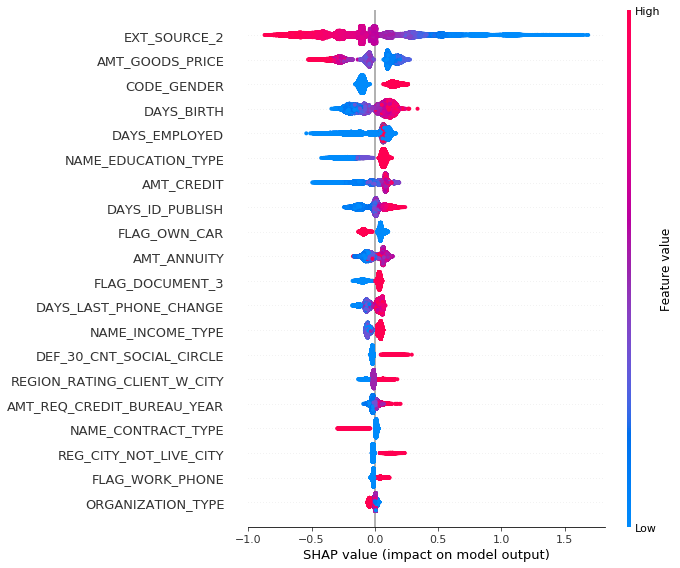

In [20]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_test,show=False)
plt.savefig('summary_plot.png',bbox_inches = 'tight')

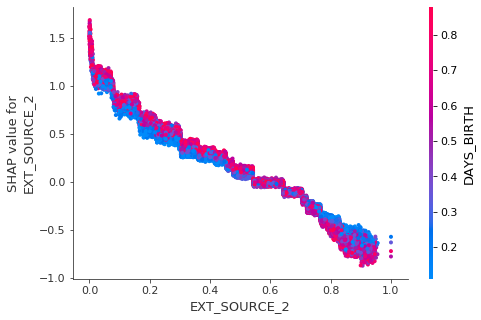

In [33]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset

shap.dependence_plot("EXT_SOURCE_2",shap_values, X_test,show=False)
plt.savefig('dependence_plot.png',bbox_inches = 'tight')
